In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel('C:/Users/diksh/Desktop/Data/NPTEL data set/CART.xlsx')

In [8]:
data

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [9]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [10]:
le_age = LabelEncoder()
le_income = LabelEncoder()
le_student = LabelEncoder()
le_credit_rating = LabelEncoder()
le_buys_computer = LabelEncoder()

In [11]:
data['age_n'] = le_age.fit_transform(data['age'])
data['income_n'] = le_income.fit_transform(data['income'])
data['student_n'] = le_student.fit_transform(data['student'])
data['credit_rating_n'] = le_student.fit_transform(data['credit_rating'])
data['buys_computer_n'] = le_student.fit_transform(data['buys_computer'])

In [12]:
data.head()

,RID,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,youth,high,no,fair,no,2,0,0,1,0
1,2,youth,high,no,excellent,no,2,0,0,0,0
2,3,middle_aged,high,no,fair,yes,0,0,0,1,1
3,4,senior,medium,no,fair,yes,1,2,0,1,1
4,5,senior,low,yes,fair,yes,1,1,1,1,1


In [13]:
data_new = data.drop(['age','income', 'student', 'credit_rating','buys_computer'], axis= 'columns')
data_new.head()

,RID,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1


In [14]:
feature_cols = ['age_n', 'income_n', 'student_n	','credit_rating_n']
x = data_new.drop(['buys_computer_n', 'RID'], axis='columns')
y = data_new['buys_computer_n']

In [15]:
x.head

<bound method NDFrame.head of     age_n  income_n  student_n  credit_rating_n
0       2         0          0                1
1       2         0          0                0
2       0         0          0                1
3       1         2          0                1
4       1         1          1                1
5       1         1          1                0
6       0         1          1                0
7       2         2          0                1
8       2         1          1                1
9       1         2          1                1
10      2         2          1                0
11      0         2          0                0
12      0         0          1                1
13      1         2          0                0>

In [16]:
y.head

<bound method NDFrame.head of 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: buys_computer_n, dtype: int32>

In [17]:
#builing a decision tree without splitting
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier ()
dt = clf.fit(x,y)
dt

DecisionTreeClassifier()

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

In [29]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, 
                filled=True, rounded=True, 
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png ('buys_computer.png')

True

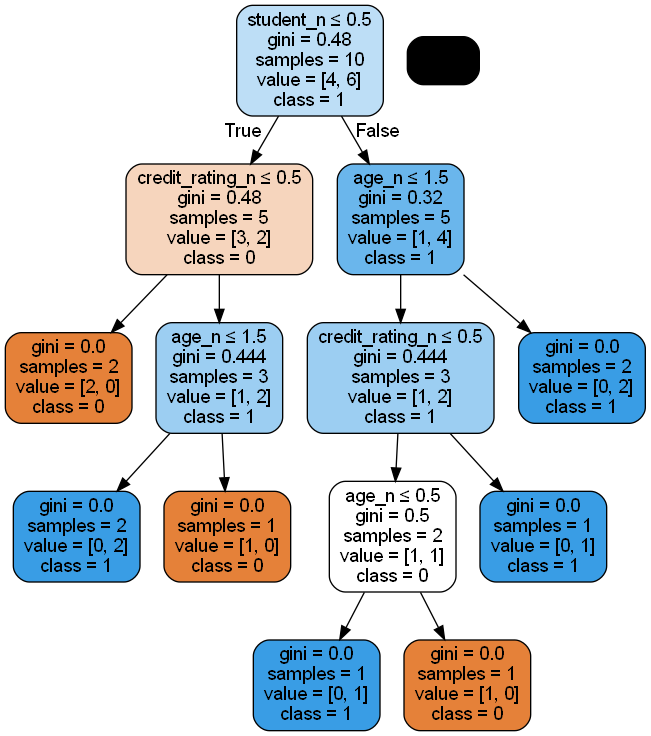

In [30]:
Image(graph.create_png())

In [22]:
#splitting data
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
dt = clf.fit(x_train,y_train)
dt

DecisionTreeClassifier()

In [26]:
#evaluvating model
from sklearn import metrics
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [31]:
#visualizing decision tree
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

In [32]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, 
                filled=True, rounded=True, 
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png ('buys_computer.png')

True

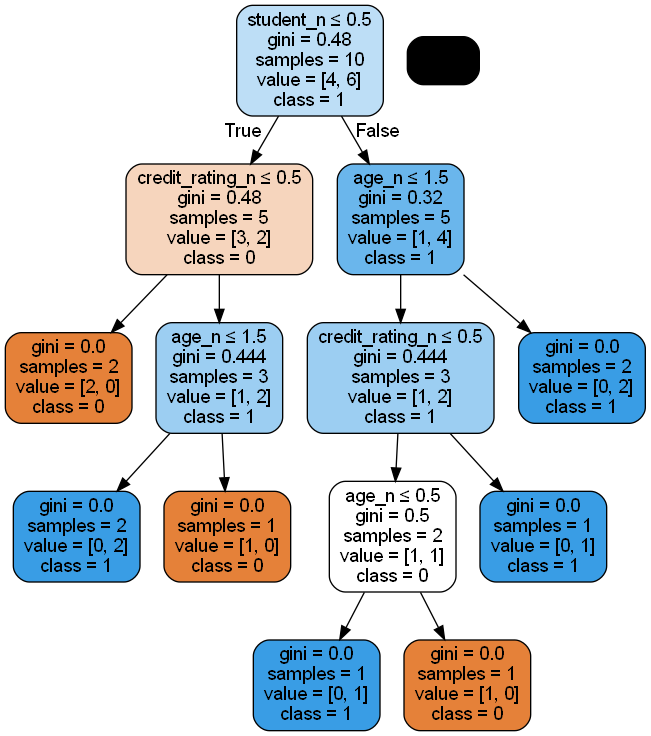

In [33]:
Image(graph.create_png())

In [ ]:
#CART - Classification and Regression Trees which is performed with splitting the data and without splitting the data